In [104]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive/')

In [105]:
# 경기도 확진일, 확진자 Data Set
filename = '/content/drive/My Drive/Colab Notebooks/gg_covid19_cnt.csv'
data = pd.read_csv(filename)

data.head()

,stdDay,defCnt
0,2020-09-12,3871
1,2020-09-11,3839
2,2020-09-10,3792
3,2020-09-09,3742
4,2020-09-08,3687


In [106]:
# 경기도 코로나19 확진자 추이
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=data.stdDay,
        y=data.defCnt,
        name='Confirmed in Gyeonggi-do'
    )
)

fig

In [107]:
# Facebook Prophet 예측 모델에 넣을 데이터프레임 생성
df_prophet = data.rename(columns={
    'stdDay': 'ds',
    'defCnt': 'y'
})

df_prophet.tail()

,ds,y
188,2020-03-08,141
189,2020-03-07,130
190,2020-03-06,120
191,2020-03-05,110
192,2020-03-04,101


In [108]:
# 모델 생성
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

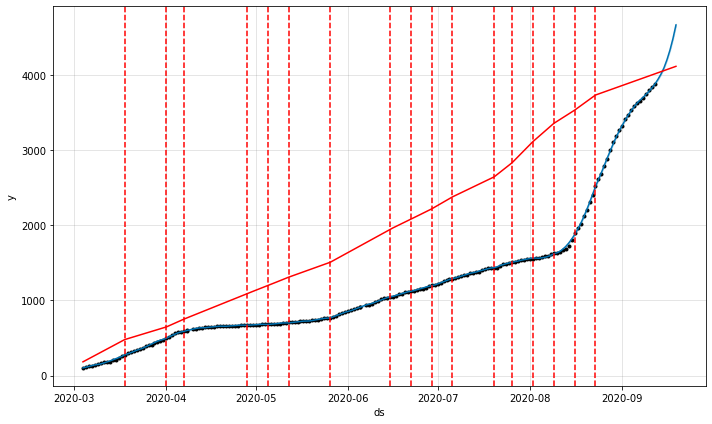

In [109]:
# changepoint 그래프 반영
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)